In [15]:
import pandas as pd
import matplotlib.pyplot as plt
di_df=pd.read_csv('diabetes.csv')
y=di_df['Outcome']
di_df.drop(columns='Outcome',inplace=True)

len([col for col in di_df.columns if di_df[col].dtype=='int64' or di_df[col].dtype=='float64'])
di_df.isnull().sum()# there is no missing values and no catg columns so we have not done missing values  replace step and one hot encoding

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

0.8077987626180398

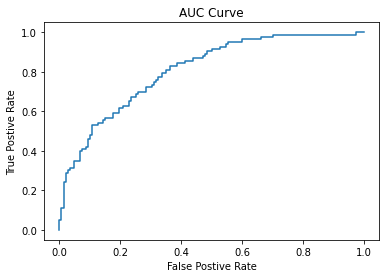

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score


x_train,x_test,y_train,y_test=train_test_split(di_df,y,test_size=0.3,random_state=50)

logreg=LogisticRegression()

logreg.fit(x_train,y_train)

y_test_pred=logreg.predict(x_test)

a=pd.DataFrame( {'test_act':y_test,'test_pred':y_test_pred})

confusion_matrix(y_test,y_test_pred)
precision_score(y_test,y_test_pred)
recall_score(y_test,y_test_pred)
f1_score(y_test,y_test_pred)

pos_probs=logreg.predict_proba(x_test)[::,1]

fpr,tpr,threshold=roc_curve(y_test,pos_probs)
fpr,tpr,threshold

plt.plot(fpr,tpr)
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('AUC Curve')

roc_auc_score(y_test,pos_probs)




